plot max temperature evolution AND beam profile AND SEM+Thermionic emission 

2024.03.27, mariusz.sapinski@psi.ch




In [1]:
import matplotlib.pyplot as plt
import pandas as pd

#matplotlib notebook


In [2]:
# read simulation configuration file name
with open("Last.txt") as f:
    cfname=f.readlines()[1]
confname=cfname[26:]    
print(confname)    

CERN_SPS_BWS41677.txt 



In [3]:
# for WIRESCANNER option output only
#dft = pd.read_csv("MaxTempVSTime.txt", skiprows=3, delim_whitespace=True, names=["em","time","pos","maxT"])
#dfc = pd.read_csv("IntensityVSTime.txt", skiprows=3, delim_whitespace=True, names=["time","pos","curr"])

# new format
#df = pd.read_csv("PSI_pChann_MBPTWS.txt", skiprows=4)
df = pd.read_csv("Last.txt", skiprows=7)

print(df.columns)


Index(['#   Time [us]', ' Position [mm]', ' Npart', ' MaxTemp [K]',
       ' SEMcurr [uA]', ' THcurr [uA] '],
      dtype='object')


In [4]:
# rename columns
df.rename({"#   Time [us]":"time"," Position [mm]":"pos"," Npart":"npart"," MaxTemp [K]":"maxt"," SEMcurr [uA]":"isem"," THcurr [uA] ":"ithc"}, axis='columns',inplace=True)

In [5]:
#print(dfc)
print(df)

            time        pos         npart      maxt          isem  \
0          0.471  -3.800000  2.001916e+07   300.000  2.956339e-10   
1          0.942  -3.799529  2.014399e+07   300.000  2.974774e-10   
2          1.413  -3.799058  2.026958e+07   300.000  2.993321e-10   
3          1.884  -3.798587  2.039595e+07   300.000  3.011982e-10   
4          2.355  -3.798116  2.052308e+07   300.000  3.030757e-10   
...          ...        ...           ...       ...           ...   
99995  47098.116  43.297645  0.000000e+00  1627.200  0.000000e+00   
99996  47098.587  43.298116  0.000000e+00  1627.195  0.000000e+00   
99997  47099.058  43.298587  0.000000e+00  1627.190  0.000000e+00   
99998  47099.529  43.299058  0.000000e+00  1627.185  0.000000e+00   
99999  47100.000  43.299529  0.000000e+00  1627.180  0.000000e+00   

               ithc  
0      7.943860e-92  
1      7.943860e-92  
2      7.943860e-92  
3      7.943860e-92  
4      7.943860e-92  
...             ...  
99995  2.910275e-

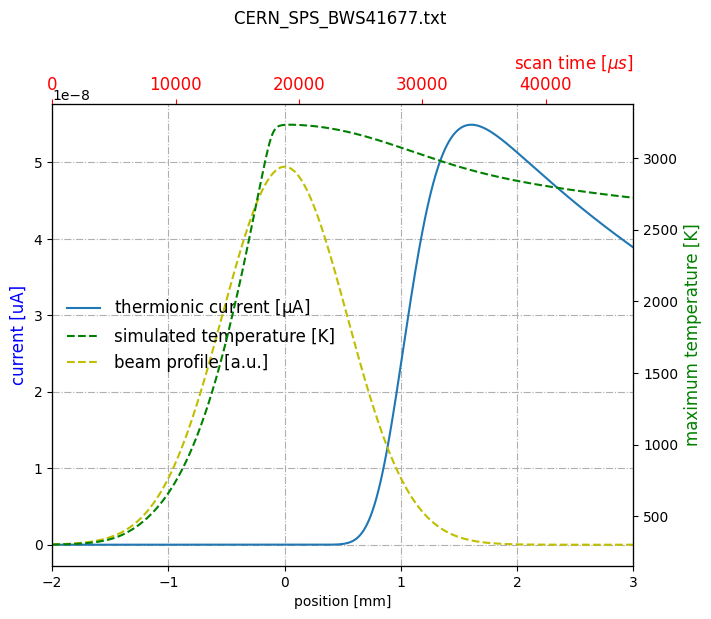

In [18]:
fig, ax = plt.subplots(1, figsize=(7.5,6))

# factor 2 is for 2 wires
#hsimse, = ax.plot([x*1 for x in df["pos"]],[2*x for x in df["isem"]],label=r"SEM current [$\rm \mu A$]")
#hsimit, = ax.plot([x*1 for x in df["pos"]],[2*x/10 for x in df["ithc"]],label=r"thermionic current/10 [$\rm \mu A$]")
hsimit, = ax.plot([x*1 for x in df["pos"]],[x for x in df["ithc"]],label=r"thermionic current [$\rm \mu A$]")
#scale=3.0*df["isem"].max()/df["npart"].max()
scale=0.9*df["ithc"].max()/df["npart"].max()

hbeamp, = ax.plot([x*1 for x in df["pos"]],[scale*x for x in df["npart"]],"y--",label="beam profile [a.u.]")
ax.set_title(confname) 
#ax.set_ylim(0,0.6)
ax.grid(True, linestyle='-.')


axtemp = ax.twinx()
#axtemp.set_ylim(0,2800)
hsimt, = axtemp.plot([x*1 for x in df["pos"]],df["maxt"],'g--',label="simulated temperature [K]")
axtemp.set_ylabel("maximum temperature [K]", fontsize=12, color='g')

ax.set_xlabel("position [mm]")
ax.set_ylabel("current [uA]", fontsize=12, color='b')

axtime = ax.twiny()
tlimend=(df["time"].iloc[-1]-df["time"].iloc[0]) # ? 60 mm/s
axtime.set_xlim(0,tlimend)
axtime.set_xlabel(r"scan time [$\mu s$]",loc="right",fontsize=12, color='red', labelpad=5)
axtime.tick_params(axis='x', colors='red', labelsize=12)    #setting up X-axis tick color to red
#ax.tick_params(axis='both', which='major', labelsize=10)

ax.set_xlim(-2,3)


#ax.legend(handles=[hsimse,hsimit,hsimt,hbeamp], fontsize=12, frameon=False)
ax.legend(handles=[hsimit,hsimt,hbeamp], fontsize=12, frameon=False)
#ax.grid()

plt.savefig('all.png')

In [7]:
print("dt [us] = ",df["time"].iloc[2]-df["time"].iloc[1])

dt [us] =  0.4710000000000001


In [8]:
# max SEM current [uA] 
print(4*max(df['isem']))

92.05379253427512
